# Optional Lab - Multi-class Classification


## 1.1 Goals

在这个实验室中，您将使用神经网络探索一个多类分类的例子。
<figure>
 <img src="../work/images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Tools
您将使用一些绘图例程。它们存储在此目录中的 `lab_utils_multiclass_TF.py` 中.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
神经网络经常用于对数据进行分类。例如神经网络：
- 读入照片并将照片中的对象分类为{狗，猫，马，其他}
- 读入一个句子并将其元素的“词性”分类：{名词、动词、形容词等。}

这种类型的网络将在其最终层中具有多个单元。每个输出与一个类别相关联。当将输入示例应用于网络时，具有最高值的输出是预测的类别。如果将输出应用于softmax函数，则softmax的输出将提供输入属于每个类别的概率。

在这个实验室中，您将看到一个在Tensorflow中构建多类网络的例子。然后我们将看一下神经网络是如何进行预测的。

让我们首先创建一个四类数据集。

## 2.1 Prepare and visualize our data
我们将使用Scikit-Learn的`make_blobs`函数制作一个包含4个类别的训练数据集，如下图所示。

In [58]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

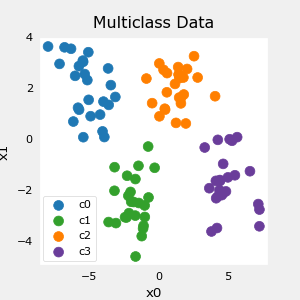

In [59]:
plt_mc(X_train,y_train,classes, centers, std=std)

每个点代表一个训练样例。轴（x0，x1）是输入，颜色表示示例所关联的类别。一旦训练完成，模型将呈现给一个新的样例（x0，x1），并预测其所属的类别。


虽然是生成的，但这个数据集代表了很多现实世界的分类问题。有几个输入特征（x0，…，xn）和几个输出类别。模型被训练使用输入特征来预测正确的输出类别。

In [60]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model
<img align="Right" src="../work/images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
本实验室将使用如下所示的2层网络。

与二分类网络不同，该网络有四个输出，每个输出对应一个类别。给定一个输入样例，具有最高值的输出是输入的预测类别。


下面是在Tensorflow中构建此网络的示例。请注意，输出层使用的是“线性”而不是“softmax”激活。虽然可以在输出层中包含softmax，但在训练期间如果将线性输出传递给损失函数，它会更加数值稳定。如果模型用于预测概率，则可以在该点应用softmax。

In [73]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)


以下语句编译并训练了神经网络。将`from_logits=True`作为损失函数的参数设置指定输出激活为线性而不是softmax。

In [74]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3630
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2880
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2170
Epoch 4/200
4/4 [==============================] - 0s 1000us/step - loss: 1.1662
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1165
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0780
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0478
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0172
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9930
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9714
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9527
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9358
Epoch 13/200
4/4 [==============================] - 0s 2ms

184/184 [==============================] - 0s 596us/step


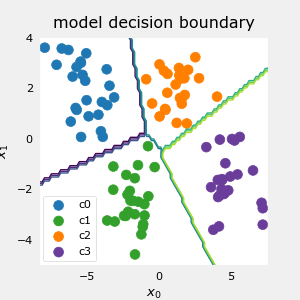

In [75]:
plt_cat_mc(X_train, y_train, model, classes)

下边是`from_logits=False`的结果

In [64]:
tf.random.set_seed(1234)  # applied to achieve consistent results
modelS = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'softmax', name = "L2")
    ]
)

In [65]:
modelS.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

modelS.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.7886
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.6556
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1.5369
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4348
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3298
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2398
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1502
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0707
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0041
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.9452
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8923
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8466
Epoch 13/200
4/4 [==============================] - 0s 1ms/st

With the model trained, we can see how the model has classified the training data.

184/184 [==============================] - 0s 596us/step


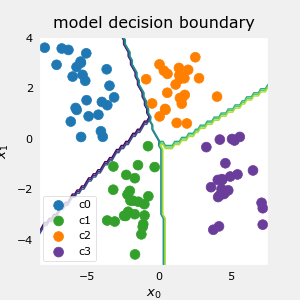

In [66]:
plt_cat_mc(X_train, y_train, modelS, classes)


上面的决策边界显示了模型如何划分输入空间。这个非常简单的模型在分类训练数据时没有遇到任何问题。它是如何做到的？让我们更详细地看一下这个网络。


下面，我们将从模型中提取已训练的权重，并使用它来绘制每个网络单元的函数。在下面，有关结果的更详细解释。您不需要了解这些细节就可以成功使用神经网络，但了解它们可能有助于更好地理解层如何组合来解决分类问题。

In [76]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

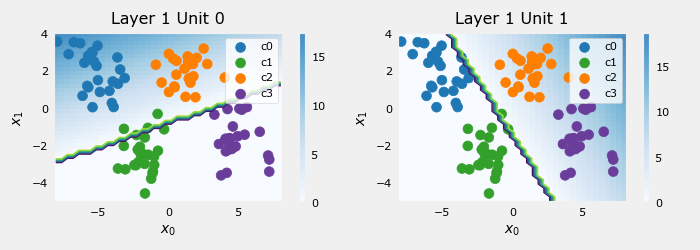

In [77]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

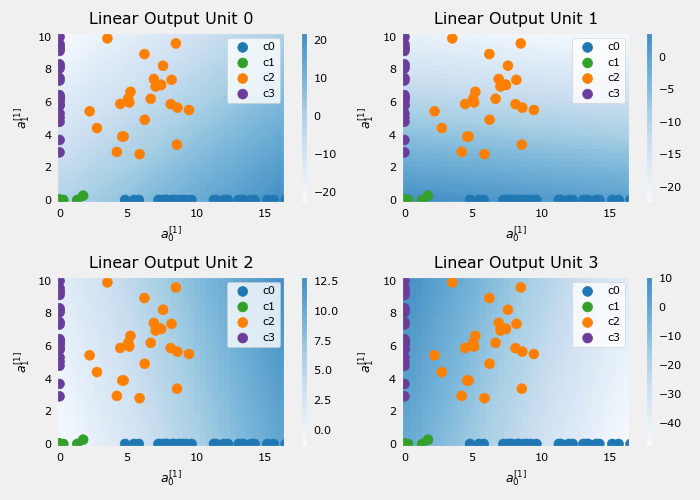

In [78]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.zeros_like(X_train)
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="../work/images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">


这些图展示了网络第一层中单元0和单元1的函数。轴上的输入为($x_0,x_1$)。单元的输出由背景的颜色表示。右侧的色条表示了颜色与输出之间的对应关系。请注意，由于这些单元使用了ReLu，输出不一定在0和1之间，在这种情况下峰值大于20。

这个图中的等高线显示了输出$a^{[1]}_j$为零和非零之间的转换点。回想一下ReLu的图形：<img align="right" src="../work/images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> 图中的等高线是ReLu函数中的拐点。

单元0已将类别0和1与类别2和3分开。在线的左侧（类别0和1）的点将输出零，而在线的右侧的点将输出大于零的值。单元1已将类别0和2与类别1和3分开。在线的上方（类别0和2）的点将输出零，而在线的下方的点将输出大于零的值。让我们看看这在下一层中是如何运作的！

#### Layer 2, the output layer  <img align="Right" src="../work/images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

这些图中的点是经过第一层平移的训练示例。一种思考方式是第一层已经创建了一个新的特征集，供第二层评估。这些图中的轴是前一层的输出$a^{[1]}_0$和$a^{[1]}_1$。如上所述，类别0和1（绿色和蓝色）具有$a^{[1]}_0 = 0$，而类别1和2（蓝色和绿色）具有$a^{[1]}_1 = 0$。  

再次提醒，背景颜色的强度表示最高值。
单元0将在接近（0,0）的值处产生最大值，其中映射了类别0（蓝色）。  

单元1在左上角产生最高值，选择类别1（绿色）。  

单元2针对右下角，其中类别3（橙色）位于此处。  

单元3在右上角产生最高值，选择我们的最终类别（紫色）。


图表中不明显的另一个方面是单元之间的值已经协调。一个单元仅仅产生一个所选择类别的最大值是不够的，还必须是该类别所有单元中的最高值。这是通过隐含在损失函数（SparseCategoricalCrossEntropy）中的softmax函数完成的。与其他激活函数不同，softmax函数适用于所有输出。


您可以在不了解每个单元正在处理什么的情况下成功使用神经网络。希望这个例子提供了一些关于神经网络内部发生了什么的直觉。

## Congratulations!
You have learned to build and operate a neural network for multiclass classification.
